# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats 
from numpy import round 
import matplotlib.pyplot as plt 

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [3]:
def create_table(DF): 
    df = DF[['race','call']].copy() 
    Con_Table = pd.crosstab(df.race,df.call) 
    Con_Table.columns = ['No','Yes'] 
    Con_Table.index = ['Black','White'] 
    return Con_Table, df 

In [4]:
def my_chi2(X): 
    chi2, p, _, expected_distribution = scipy.stats.chi2_contingency(X, correction=True) 
    print('The p-value is : '+ '{:.3}'.format(p) ) 
    print('The test statistic is : '+ '{:.3}'.format(chi2) ) 
    print('The expected distribution is :') 
    print(round(expected_distribution)) 

In [5]:
def prepare_for_classification(mydf): 
    df = mydf[['yearsexp','sex','education','race','manager']].copy() 
    df['sex'][df['sex']=='f']=1.0 
    df['sex'][df['sex']=='m']=0.0 
    df['race'][df['race']=='w']=0.0 
    df['race'][df['race']=='b']=1.0 
    X = df.values 
    y = mydf.call.values 
    return X,y 

In [6]:
def LogRe(X,y): 
    from sklearn.linear_model import LogisticRegression 
    from sklearn import metrics 
    clf = LogisticRegression() 
    clf.fit(X, y) 
    preds = clf.predict_proba(X)[:,1] 
    fpr, tpr, _ = metrics.roc_curve(y, preds) 
    auc = metrics.auc(fpr,tpr) 
    plt.figure(1) 
    plt.plot(fpr,tpr,'o-'); 
    plt.title("AUC =" + str(auc)) 
    plt.xlabel('False-Positive Rate') 
    plt.ylabel('True-Positive Rate') 
    plt.show() 
    return fpr, tpr, auc 

In [7]:
import scipy.stats
Con_Table, df = create_table(data)
my_chi2(Con_Table)

The p-value is : 5e-05
The test statistic is : 16.4
The expected distribution is :
[[ 2239.   196.]
 [ 2239.   196.]]


In [10]:
X, y = prepare_for_classification(data)

C:\Users\yepeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yepeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\yepeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\yepeng\Anacond

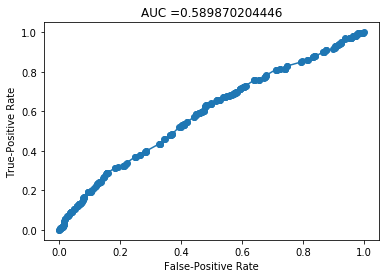

In [11]:
fpr, tpr, auc = LogRe(X,y)

##### What test is appropriate for this problem? Does CLT apply?

Ki square test is appropriate for this problem. CLT doen't apply.

##### What are the null and alternate hypotheses?

Null Hypothesis: race and call are independent.

Alternative Hypothesis: race and call are dependent.

##### Compute margin of error, confidence interval, and p-value.

I used chi square test and got the p value is 0.00005.

##### Write a story describing the statistical significance in the context or the original problem.

We reject H0 and consider race and call are dependent to each other at p value 0.05 level.

##### Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

My analysis doesn't show race is the most important in callback success. Logistic regression shows 'yearsexp','sex','education','race','manager' all have impact on callback success.